In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yaml

from LeastCorrelatedSubset import LeastCorrelatedSubset


In [2]:
dataPath = './/Data//adjclose//'
fileInName = 'bonds_char.csv'
df = pd.read_csv(dataPath + fileInName, index_col=0)
# df = df.iloc[:200] # testing
df = df.dropna()
def isnumber(x):
    try:
        float(x)
        return True
    except:
        return False
df_m = df[df.applymap(isnumber)].dropna(how='all', axis=1)
df_m = df_m.applymap(float)
measurable_var = df_m.columns
categorical_var = [c for c in df.columns if c not in measurable_var]
df


COUNTRY_FULL_NAME         INDUSTRY_SECTOR  DUR_ADJ_MID  \
ticker                                                                      
US56501RAC07 Corp@            CANADA               Financial     5.371773   
XS1405757631 Corp@            CANADA               Financial     1.183820   
SG7FH4000003 Corp@         SINGAPORE               Financial     6.267498   
SG76F2000003 Corp@         SINGAPORE               Financial     3.473930   
XS2075921887 Corp@       NETHERLANDS               Financial     4.290218   
US606822BH67 Corp@             JAPAN               Financial     7.606218   
XS1247821397 Corp@             JAPAN               Financial     0.288904   
XS0803109270 Corp@    CAYMAN ISLANDS               Financial     2.252593   
XS1416409503 Corp@         AUSTRALIA               Financial     2.970681   
USJ54675AB95 Corp@             JAPAN               Financial     4.074282   
XS1297851955 Corp@         AUSTRALIA          Communications     2.434140   
CA780086RF34 Corp@            CANADA               Financial     4.339773   
USU75888AA26 Corp@     UNITED STATES                  Energy     0.608007   
XS1494426932 Corp@          MALAYSIA               Financial     1.539951   
USY72596BU56 Corp@             INDIA                  Energy     4.437557   
XS1785829927 Corp@       PHILIPPINES               Financial     2.801235   
US168863AV04 Corp@             CHILE              Government     0.416670   
XS1810775145 Corp@         INDONESIA              Government     4.870354   
US71567RAM88 Corp@         INDONESIA              Government     7.469037   
US455780CK06 Corp@         INDONESIA              Government     7.979097   
XS1602111566 Corp@    BRITISH VIRGIN               Financial     1.109886   
XS1713316252 Corp@    BRITISH VIRGIN               Financial     5.031803   
XS1555404786 Corp@         HONG KONG              Government     6.303107   
XS1226268735 Corp@         HONG KONG              Government     0.246543   
XS0841678278 Corp@             INDIA                  Energy     2.444330   
XS0701035676 Corp@       NETHERLANDS               Financial     1.898861   
US500630CC01 Corp@       SOUTH KOREA               Financial     3.623641   
US40963MAH51 Corp@       SOUTH KOREA               Financial     4.097405   
USY4841LGS44 Corp@       SOUTH KOREA              Government     2.532703   
AU3CB0248862 Corp@           BRITAIN               Financial     6.589652   
...                              ...                     ...          ...   
US75281ABA60 Corp@     UNITED STATES                  Energy     2.512278   
USU81193AL54 Corp@     UNITED STATES              Industrial     2.570466   
USG8449VAB20 Corp@    BRITISH VIRGIN               Utilities     3.040562   
US82460EAK64 Corp@       SOUTH KOREA               Financial     1.982549   
XS0873639701 Corp@    CAYMAN ISLANDS               Financial     2.714177   
US85172FAL31 Corp@     UNITED STATES               Financial     2.713735   
XS0836488485 Corp@         AUSTRALIA               Utilities     2.913661   
US852061AS99 Corp@     UNITED STATES          Communications     2.459256   
XS0874014722 Corp@           BRITAIN               Financial     2.684489   
US80281LAF22 Corp@           BRITAIN               Financial     1.782190   
US674215AE80 Corp@     UNITED STATES                  Energy     2.381582   
US71654QBG64 Corp@            MEXICO                  Energy     2.732227   
US718172BU28 Corp@     UNITED STATES  Consumer, Non-cyclical     2.898105   
US74733VAC46 Corp@     UNITED STATES                  Energy     2.748809   
US74819RAP10 Corp@            CANADA          Communications     2.614779   
XS0866438475 Corp@           BERMUDA          Communications     2.816474   
US747525AR43 Corp@     UNITED STATES              Technology     2.714501   
US780097AY76 Corp@           BRITAIN               Financial     2.949354   
XS1943451788 Corp@    BRITISH VIRGIN               Financial     0.866901   
US900123CA66 Co

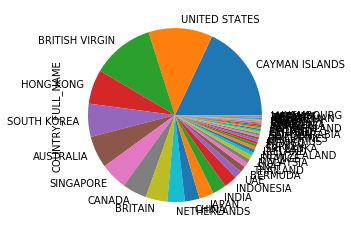

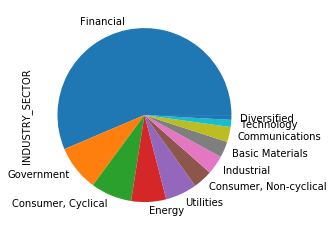

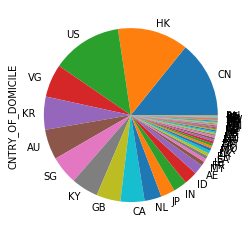

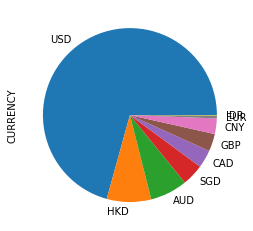

In [3]:
for c in categorical_var:
    plt.figure()
    df[c].value_counts().plot.pie()
    

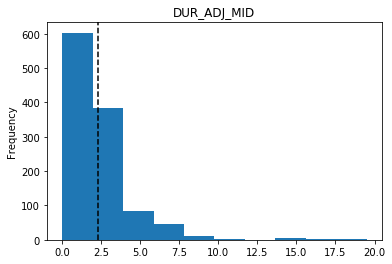

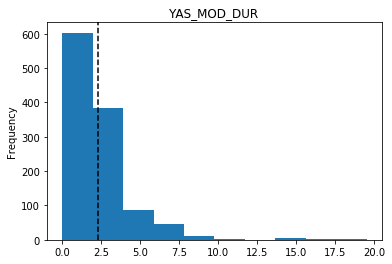

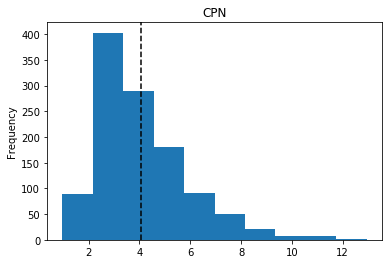

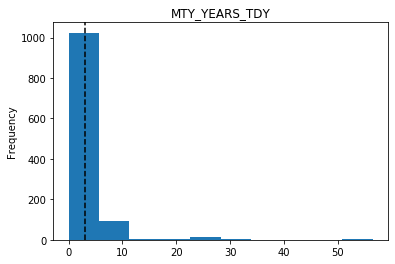

In [26]:
for c in measurable_var:
    plt.figure()
    df[c].plot.hist()
    plt.axvline(df[c].mean(), color='k', linestyle='dashed')
    plt.title(c)

In [4]:
LCS = LeastCorrelatedSubset()
corr = LCS.transpose_corr(df)
res = LCS.LCS(corr, verbose=True)


complete


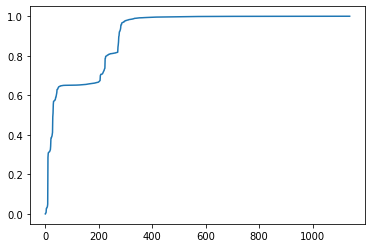

In [5]:
plt.figure()
plt.plot(range(len(res[1])), res[1])

In [10]:
print(res[1][40:60])

[0.591046586163785, 0.5990498386697771, 0.6060507977530005, 0.6129935059694099, 0.6286353860152257, 0.6307079273461937, 0.6307513799210019, 0.6325969010267332, 0.637776731016313, 0.6395298406854099, 0.6424649191490215, 0.643571961282348, 0.64390915376375, 0.6451645440332342, 0.6456777066867774, 0.6458655011647367, 0.6462711207900245, 0.647697108181902, 0.6480757266849705, 0.6481329214824142]


In [11]:
num_tic = 45
tickers = res[0][:num_tic]
df_sel = df.loc[tickers]


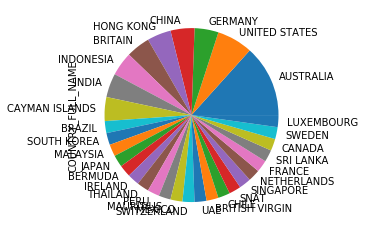

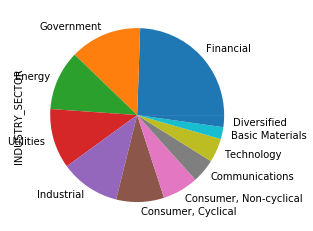

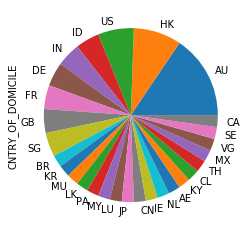

In [12]:
for c in categorical_var:
    plt.figure()
    df_sel[c].value_counts().plot.pie()
    

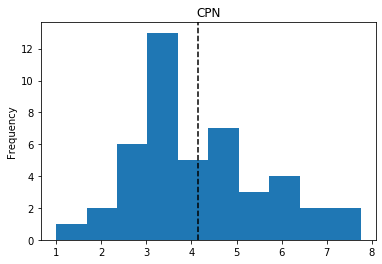

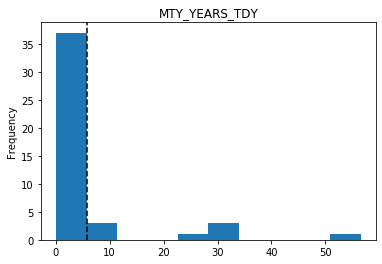

In [27]:
for c in measurable_var:
    plt.figure()
    df_sel[c].plot.hist()
    plt.axvline(df_sel[c].mean(), color='k', linestyle='dashed')
    plt.title(c)

In [13]:
tickers_cf = [t.replace('@','') for t in tickers]

group_pointer1 = df_sel['COUNTRY_FULL_NAME'].tolist()
group_pointer2 = df_sel['INDUSTRY_SECTOR'].tolist()

groups1 = list(set(group_pointer1))
groups2 = list(set(group_pointer2))

duration = df_sel['DUR_ADJ_MID'].tolist()


In [14]:
Tbounds = [[0,2/num_tic]]*num_tic

ng1 = len(groups1)
Gbounds1 = [[0,2/ng1]]*ng1
ng2 = len(groups2)
Gbounds2 = [[0,2/ng2]]*ng2


In [18]:
# new yaml
config = {'tickers' : tickers_cf,
          'Tbounds' : Tbounds,
          'group_pointer' : [group_pointer1, group_pointer2],
          'groups' : [groups1, groups2],
          'Gbounds' : [Gbounds1, Gbounds2],
          'duration' : duration,
          'start_date' : dt.datetime.strptime('2018-01-01', '%Y-%m-%d').date(),
          'end_date' : dt.datetime.strptime('2020-01-01', '%Y-%m-%d').date(),
          'time_horizon' : 6,
          'black_litterman' : False,
          'target_return' : None,
          'leverageCap' : 1,
          'lev_cost' : None,
          'min_level' : None,
          'annualization' : 252,
          'rb_interval' : 21,
          'rb_period' : 252,
          'inputType' : 'price',
          'portType' : 'MPT',
          'option' : 'Max Sharpe',
          'dataPath' : './Data/adjclose/',
          'dataFileName' : 'outputdataGFIOP',
          'dateFormat' : '%m/%d/%Y',
          'fill_method' : None,
          'directory' : './testyaml/',
          'run_test' : False,
          'plot_graph' : None,
          'num_portfolios' : 1}


In [ ]:
# new yaml

with open('./config.yaml', 'w') as file:
    documents = yaml.dump(config, file, sort_keys=False)

In [31]:
# yaml 3.12
import collections
data = collections.OrderedDict()
data['tickers'] = config['tickers']
data['Tbounds'] = config['Tbounds']
data['group_pointer'] = config['group_pointer']
data['groups'] = config['groups']
data['Gbounds'] = config['Gbounds']
data['duration'] = config['duration']
data['start_date'] = config['start_date']
data['end_date'] = config['end_date']
data['time_horizon'] = config['time_horizon']
data['black_litterman'] = config['black_litterman']
data['target_return'] = config['target_return']
data['leverageCap'] = config['leverageCap']
data['lev_cost'] = config['lev_cost']
data['min_level'] = config['min_level']
data['annualization'] = config['annualization']
data['rb_interval'] = config['rb_interval']
data['rb_period'] = config['rb_period']
data['inputType'] = config['inputType']
data['portType'] = config['portType']
data['option'] = config['option']
data['dataPath'] = config['dataPath']
data['dataFileName'] = config['dataFileName']
data['dateFormat'] = config['dateFormat']
data['fill_method'] = config['fill_method']
data['directory'] = config['directory']
data['run_test'] = config['run_test']
data['plot_graph'] = config['plot_graph']
data['num_portfolios'] = config['num_portfolios']
with open('./config_312.yaml', 'w') as file:
    documents = yaml.dump(data, file)

In [28]:
# new yaml

with open('./config.yaml', 'r', encoding="utf-8") as file:
    data = yaml.load(file, Loader=yaml.FullLoader)


In [30]:
# yaml 3.12
with open('./config.yaml', 'r', encoding="utf-8") as file:
    data = yaml.load(file)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
data

{'Gbounds': [[[0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806],
   [0, 0.06451612903225806]],
  [[0, 0.18181818181818182],
   [0, 0.18181818181818182],
   [0, 0.18181818181818182],
  